In [1]:

!pip install scikit-learn==1.5.1
import sklearn
print(sklearn.__version__)  



Defaulting to user installation because normal site-packages is not writeable
1.5.1


In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import pickle
from sklearn.model_selection import RandomizedSearchCV



In [3]:
df=pd.read_csv(r'frappe.csv',sep='\t')

In [4]:
df.columns

Index(['user', 'item', 'cnt', 'daytime', 'weekday', 'isweekend', 'homework',
       'cost', 'weather', 'country', 'city'],
      dtype='object')

In [5]:
df.head()

,user,item,cnt,daytime,weekday,isweekend,homework,cost,weather,country,city
0,0,0,1,morning,sunday,weekend,unknown,free,sunny,United States,0
1,1,1,7,afternoon,saturday,weekend,unknown,free,cloudy,Spain,0
2,2,2,6,evening,monday,workday,unknown,free,cloudy,Spain,369
3,3,3,1,sunset,thursday,workday,unknown,free,unknown,United States,1028
4,4,4,428,night,thursday,workday,home,free,sunny,Switzerland,147


In [6]:
meta_app=pd.read_csv('meta.csv',sep='\t')


In [7]:
meta_app.head()

,item,package,category,downloads,developer,icon,language,description,name,price,rating,short desc
0,0,com.anydo,Productivity,"1,000,000 - 5,000,000",Any.DO,http://d2lh3rxs7crswz.cloudfront.net/com.anydo...,en,"Meet Any.DO, the best way to-do To-do's on And...",Any.DO To-do & Tasks List,Free,4.5,Any.DO helps you remember everything you have ...
1,1,com.yahoo.mobile.client.android.yahoo,News & Magazines,"1,000,000 - 5,000,000",Yahoo! Inc.,http://d2lh3rxs7crswz.cloudfront.net/com.yahoo...,en,"With Yahoo! for Android, you’ll stay connected...",Yahoo!,Free,4.2,"With Yahoo! for Android, you’ll stay connected..."
2,2,com.compasspro,Tools,"1,000,000 - 5,000,000",Mobile Essentials,http://d2lh3rxs7crswz.cloudfront.net/com.compa...,en,Professional Compass for Android. Simple and p...,Compass PRO,Free,4.1,Professional Compass for Android. Simple and p...
3,3,com.instagram.android,Social,"50,000,000 - 100,000,000",Instagram,http://d2lh3rxs7crswz.cloudfront.net/com.insta...,en,Instagram – A beautiful way to share your worl...,Instagram,Free,4.6,Instagram – A beautiful way to share your worl...
4,4,com.shoppinglist,Shopping,"10,000 - 50,000",Kiwi3,http://d2lh3rxs7crswz.cloudfront.net/com.shopp...,en,Shopping List is the most easy way to organize...,Shopping List,Free,4.5,"The most easy Shopping List. In English, for f..."


In [8]:
meta_app=meta_app[['name','item']]

print(meta_app)

                               name  item
0         Any.DO To-do & Tasks List     0
1                            Yahoo!     1
2                       Compass PRO     2
3                         Instagram     3
4                     Shopping List     4
...                             ...   ...
4077           Monster Galaxy Exile  4077
4078                Legends of Yore  4078
4079     Talking Jumpster from Mars  4079
4080  Extensive Notes Pro - Notepad  4080
4081            Android Pro Widgets  4081

[4082 rows x 2 columns]


In [9]:
print(df.columns)
print(meta_app.columns)

Index(['user', 'item', 'cnt', 'daytime', 'weekday', 'isweekend', 'homework',
       'cost', 'weather', 'country', 'city'],
      dtype='object')
Index(['name', 'item'], dtype='object')


In [10]:
df=df.merge(meta_app,on= 'item')

df.head()

,user,item,cnt,daytime,weekday,isweekend,homework,cost,weather,country,city,name
0,0,0,1,morning,sunday,weekend,unknown,free,sunny,United States,0,Any.DO To-do & Tasks List
1,1,1,7,afternoon,saturday,weekend,unknown,free,cloudy,Spain,0,Yahoo!
2,2,2,6,evening,monday,workday,unknown,free,cloudy,Spain,369,Compass PRO
3,3,3,1,sunset,thursday,workday,unknown,free,unknown,United States,1028,Instagram
4,4,4,428,night,thursday,workday,home,free,sunny,Switzerland,147,Shopping List


In [11]:
df.shape


(96203, 12)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96203 entries, 0 to 96202
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user       96203 non-null  int64 
 1   item       96203 non-null  int64 
 2   cnt        96203 non-null  int64 
 3   daytime    96203 non-null  object
 4   weekday    96203 non-null  object
 5   isweekend  96203 non-null  object
 6   homework   96203 non-null  object
 7   cost       96203 non-null  object
 8   weather    96203 non-null  object
 9   country    96203 non-null  object
 10  city       96203 non-null  int64 
 11  name       96203 non-null  object
dtypes: int64(4), object(8)
memory usage: 8.8+ MB


In [13]:
df.duplicated().sum()

0

In [14]:
df.isna().sum()

user         0
item         0
cnt          0
daytime      0
weekday      0
isweekend    0
homework     0
cost         0
weather      0
country      0
city         0
name         0
dtype: int64

In [15]:
dt_encoder=LabelEncoder()

dt_encoder.fit(df['daytime'])

df['daytime']=dt_encoder.transform(df['daytime'])

wd_encoder=LabelEncoder()

wd_encoder.fit(df['weekday'])

df['weekday']=wd_encoder.transform(df['weekday'])

wknd_encoder=LabelEncoder()

wknd_encoder.fit(df['isweekend'])

df['isweekend']=wknd_encoder.transform(df['isweekend'])

hw_encoder=LabelEncoder()

hw_encoder.fit(df['homework'])

df['homework']=hw_encoder.transform(df['homework'])

c_encoder=LabelEncoder()

c_encoder.fit(df['cost'])

df['cost']=c_encoder.transform(df['cost'])

w_encoder=LabelEncoder()

w_encoder.fit(df['weather'])

df['weather']=w_encoder.transform(df['weather'])

n_encoder=LabelEncoder()

n_encoder.fit(df['name'])

df['name']=n_encoder.transform(df['name'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96203 entries, 0 to 96202
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user       96203 non-null  int64 
 1   item       96203 non-null  int64 
 2   cnt        96203 non-null  int64 
 3   daytime    96203 non-null  int32 
 4   weekday    96203 non-null  int32 
 5   isweekend  96203 non-null  int32 
 6   homework   96203 non-null  int32 
 7   cost       96203 non-null  int32 
 8   weather    96203 non-null  int32 
 9   country    96203 non-null  object
 10  city       96203 non-null  int64 
 11  name       96203 non-null  int32 
dtypes: int32(7), int64(4), object(1)
memory usage: 6.2+ MB


In [17]:
df.describe()

,user,item,cnt,daytime,weekday,isweekend,homework,cost,weather,city,name
count,96203.000000,96203.000000,96203.000000,96203.000000,96203.000000,96203.000000,96203.000000,96203.000000,96203.000000,96203.000000,96203.000000
mean,189.646944,386.754207,81.330894,2.165317,2.885627,0.659792,0.885565,0.050872,3.432835,333.966176,1800.068990
std,156.458370,683.779627,395.414980,1.825046,2.009485,0.473781,0.447594,0.219737,3.380435,359.977130,1041.000073
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,21.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1037.000000
50%,153.000000,77.000000,8.000000,2.000000,3.000000,1.000000,1.000000,0.000000,2.000000,327.000000,1489.000000
75%,271.000000,397.000000,36.000000,3.000000,5.000000,1.000000,1.000000,0.000000,7.000000,649.000000,2960.000000
max,956.000000,4081.000000,28752.000000,6.000000,6.000000,1.000000,2.000000,1.000000,8.000000,1087.000000,3508.000000


In [18]:
print(df['item'].dtype)
print(meta_app['item'].dtype)

int64
int64


In [19]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


<Axes: xlabel='city'>

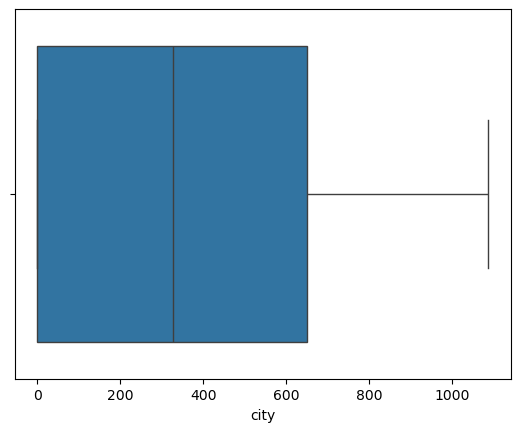

In [20]:
sns.boxplot(x='city',data=df)

In [21]:
df['city'] = pd.to_numeric(df['city'], errors='coerce')

In [22]:
quant = df['city'].quantile(q=[0.25, 0.75])
print(quant)
Q1 = quant.iloc[0]
print(Q1)
Q3 = quant.iloc[1]
print(Q3)
IQR = Q3 - Q1
print(IQR)
maxwhisker = Q3 + 1.5 * IQR
print(maxwhisker)
minwhisker = Q1 - 1.5 * IQR
print(minwhisker)


0.25      0.0
0.75    649.0
Name: city, dtype: float64
0.0
649.0
649.0
1622.5
-973.5


In [23]:
df['city']=np.where(df['city']>649,649,df['city'])

<Axes: xlabel='city'>

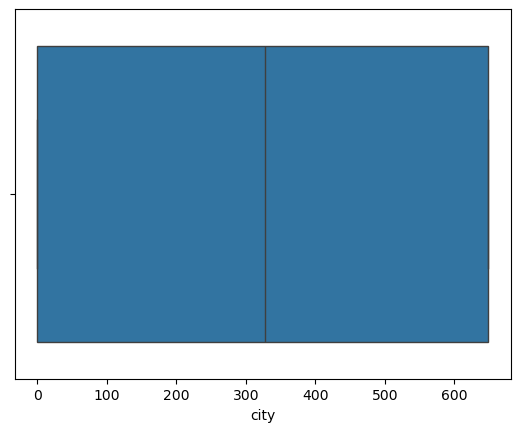

In [24]:
sns.boxplot(x='city',data=df)

<Axes: xlabel='city', ylabel='Count'>

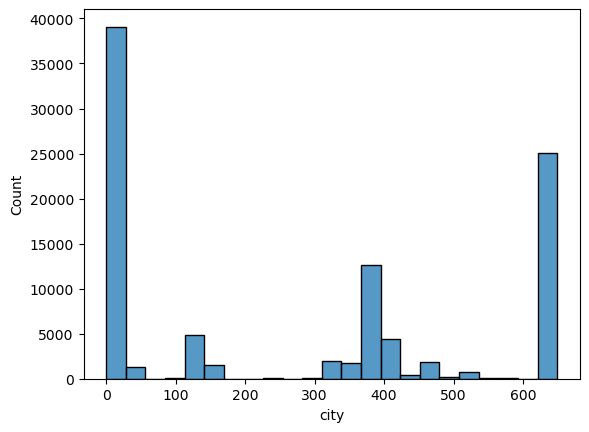

In [25]:
sns.histplot(x='city',data=df)


<Axes: xlabel='homework', ylabel='count'>

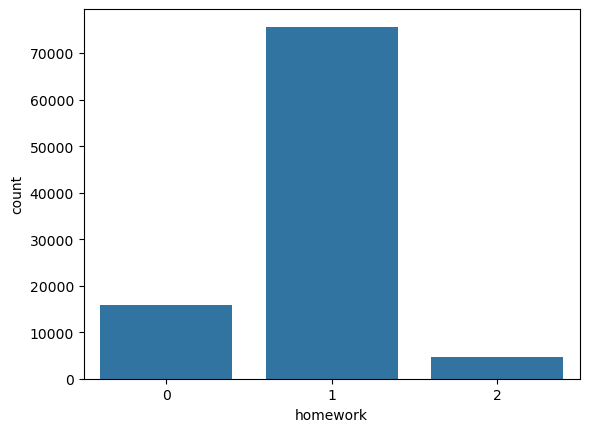

In [26]:
sns.countplot(x='homework',data=df)

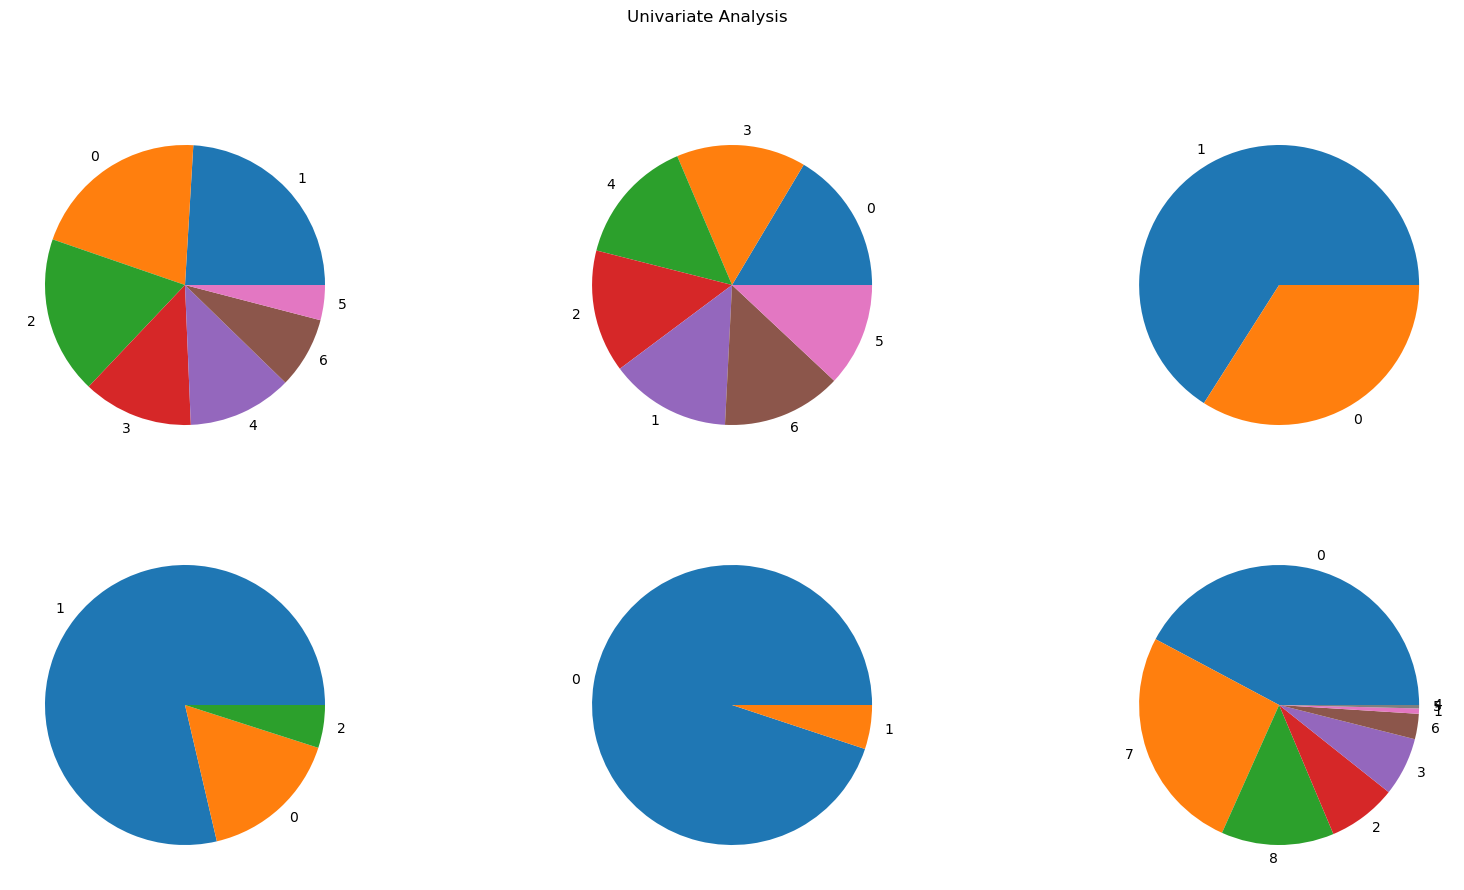

In [27]:
fig,axes=plt.subplots(2,3,figsize=(20,10))
fig.suptitle("Univariate Analysis")
col=['daytime','weekday','isweekend','homework','cost','weather']
k=0
for i in range(2):
  for j in range(3):
    d=dict(df[col[k]].value_counts())
    axes[i,j].pie(d.values(),labels=d.keys())
    k+=1


<Axes: xlabel='weather', ylabel='count'>

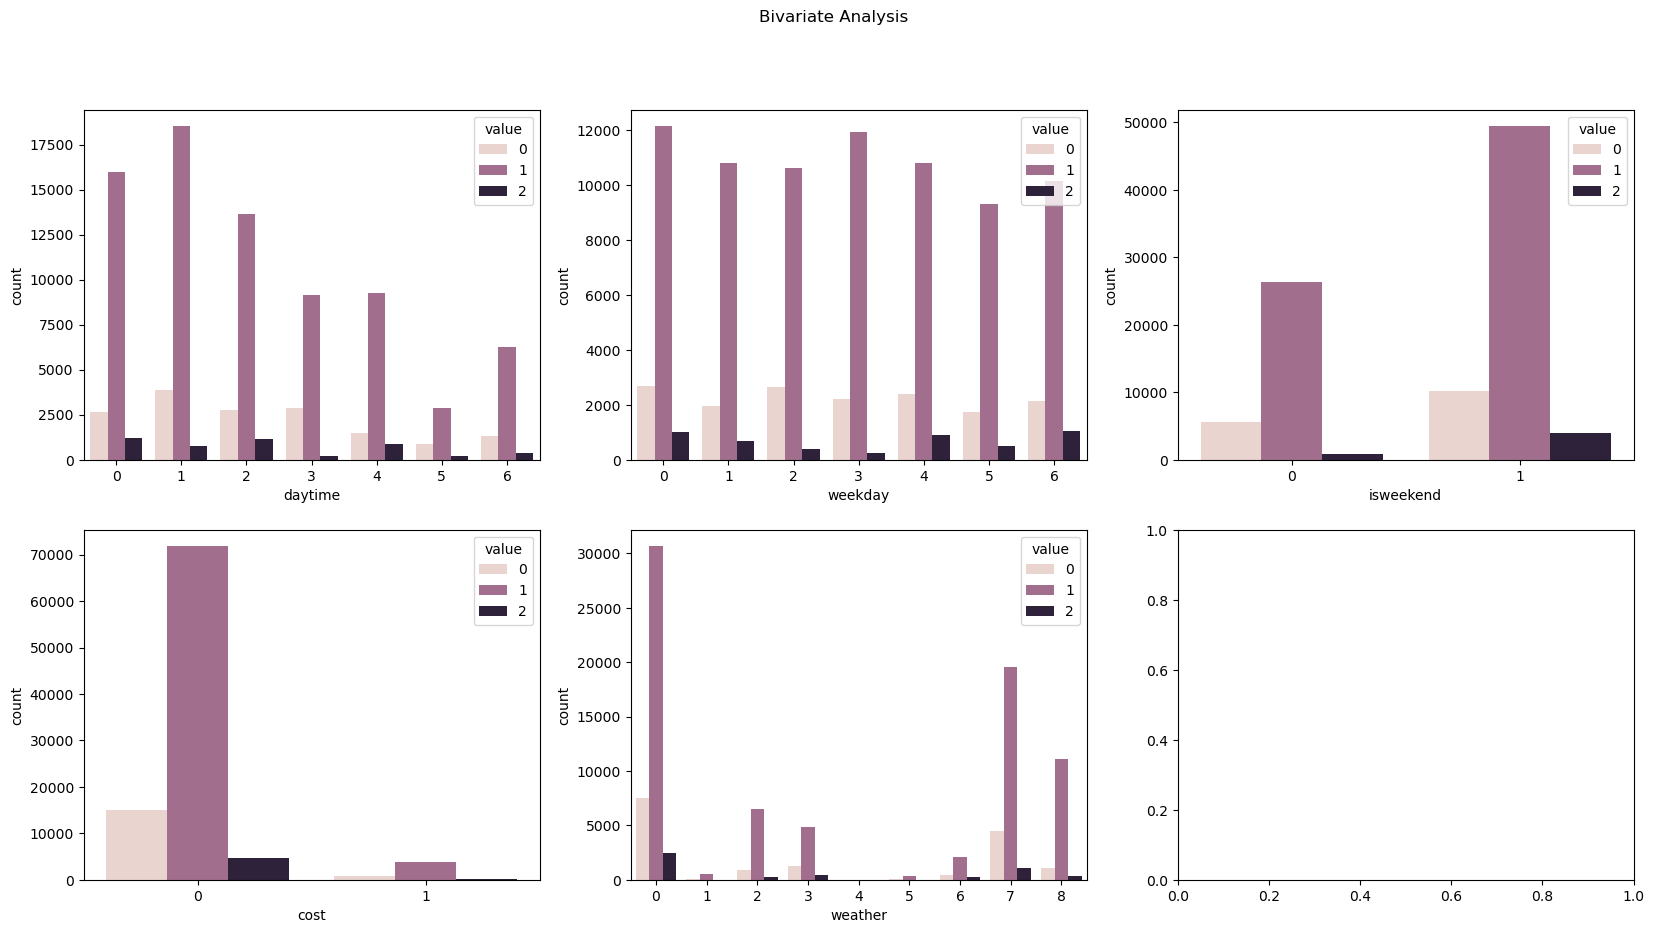

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig,axes=plt.subplots(2,3,figsize=(20,10))
fig.suptitle("Bivariate Analysis")

# Melt the dataframe to long-form
df_melted = pd.melt(df, id_vars=['daytime', 'weekday', 'isweekend','cost','weather'], value_vars=['homework'])

# Use the melted dataframe in the countplots
sns.countplot(x='daytime', hue='value', data=df_melted, ax=axes[0,0])
sns.countplot(x='weekday', hue='value', data=df_melted, ax=axes[0,1])
sns.countplot(x='isweekend', hue='value', data=df_melted, ax=axes[0,2])
sns.countplot(x='cost' , hue='value', data=df_melted, ax=axes[1,0])
sns.countplot(x='weather', hue='value',data=df_melted,ax=axes[1,1])

In [29]:
# Feature Selection
features = ['item','daytime','weekday','isweekend','cost','weather','name']
X = df[features]
y = df[["homework"]]


In [30]:
print(df['name'])

0         260
1        3217
2         698
3        1489
4        2523
         ... 
96198     260
96199    1037
96200    1994
96201    1307
96202    2429
Name: name, Length: 96203, dtype: int32


In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
df['homework'].value_counts()

homework
1    75670
0    15771
2     4762
Name: count, dtype: int64

In [33]:
smote_sampler=SMOTE(random_state=42)
X_smote,y_smote = smote_sampler.fit_resample(X,y)
smote_data = pd.concat([X_smote,y_smote],axis=1)
smote_data.shape


(227010, 8)

In [34]:
smote_data['homework'].value_counts()

homework
1    75670
0    75670
2    75670
Name: count, dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.8, random_state=42)


In [36]:
# Scaling Data so that all the features has similar weight.
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier


In [38]:
models=[]
models = [('AdaBoost', AdaBoostClassifier(algorithm='SAMME'))]
models.append(('KNeighborsClassifier',KNeighborsClassifier()))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
models.append(('RandomForestClassifier',RandomForestClassifier()))
models.append(('XGBClassifier',XGBClassifier()))
models.append(('BaggingClassifier',BaggingClassifier()))



In [39]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

model_perform = {}

for name, model in models:
    # Fit the model
    model.fit(X_train, y_train.values.ravel())
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    p = precision_score(y_test, y_pred, average='micro')
    r = recall_score(y_test, y_pred, average='micro')
    a = accuracy_score(y_test, y_pred)
    f = f1_score(y_test, y_pred, average='micro')
    
    # Store the performance metrics
    s = {'Precision': p, 'Recall': r, 'Accuracy': a, 'F1 Score': f}
    model_perform[name] = s



In [40]:
for model in model_perform:
    print(model)
    print("Precision: ",model_perform[model]['Precision'])
    print("Recall: ",model_perform[model]['Recall'])
    print("Accuracy: ",model_perform[model]['Accuracy'])
    print("F1 Score: ",model_perform[model]['F1 Score'])
    print()


AdaBoost
Precision:  0.4572430729923792
Recall:  0.4572430729923792
Accuracy:  0.4572430729923792
F1 Score:  0.4572430729923792

KNeighborsClassifier
Precision:  0.5377571472622351
Recall:  0.5377571472622351
Accuracy:  0.5377571472622351
F1 Score:  0.5377571472622351

DecisionTreeClassifier
Precision:  0.6204242103872076
Recall:  0.6204242103872076
Accuracy:  0.6204242103872076
F1 Score:  0.6204242103872076

RandomForestClassifier
Precision:  0.6379729967842827
Recall:  0.6379729967842827
Accuracy:  0.6379729967842827
F1 Score:  0.6379729967842827

XGBClassifier
Precision:  0.64430531694639
Recall:  0.64430531694639
Accuracy:  0.64430531694639
F1 Score:  0.64430531694639

BaggingClassifier
Precision:  0.6371305228844544
Recall:  0.6371305228844544
Accuracy:  0.6371305228844544
F1 Score:  0.6371305228844544



In [41]:
dt_classifier=DecisionTreeClassifier()

In [42]:
# Define the hyperparameters and their possible values for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 4, 6, 8,10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'ccp_alpha': [0.0, 0.1 ,0.2]
}


In [43]:
# Initialize RandomizedSearchCV with DecisionTreeClassifier
random_search = RandomizedSearchCV(estimator=dt_classifier,
                                   param_distributions=param_grid,
                                   scoring='accuracy',
                                   cv=3,
                                   n_iter=100,
                                   random_state=42)

In [44]:
random_search.fit(X_train, y_train)
RandomizedSearchCV(cv=3,estimator=DecisionTreeClassifier(),n_iter=100,
                   param_distributions={'ccp_alpha':[0.0, 0.1, 0.2],
                                        'criterion':['gini','entropy'],
                                        'max_depth':[None, 2, 4, 6, 8, 10], 
                                        'max_features':[None,'sqrt','log2'], 
                                        'min_impurity_decrease':[0.0, 0.1, 0.2], 
                                        'min_samples_leaf':[1, 2, 4], 
                                        'min_samples_split':[2, 5, 10], 
                                        'splitter': ['best', 'random']},

random_state=42, scoring='accuracy')

print("Best Parameters:", random_search.best_params_)

print("Best Score:", random_search.best_score_)

Best Parameters: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.0, 'max_features': None, 'max_depth': None, 'criterion': 'entropy', 'ccp_alpha': 0.0}
Best Score: 0.5765605039425576


In [45]:
print("Best Score:",random_search.score(X_test,y_test))

Best Score: 0.6036573278710189


In [46]:
dt_final=random_search

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.5928    0.6164    0.6043     60466
           1     0.6314    0.5321    0.5775     60427
           2     0.6826    0.7623    0.7202     60715

    accuracy                         0.6371    181608
   macro avg     0.6356    0.6369    0.6340    181608
weighted avg     0.6356    0.6371    0.6342    181608



0.6036573278710189


<Axes: >

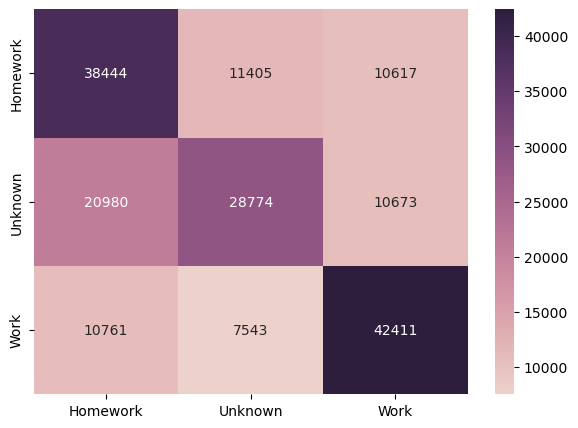

In [48]:


y_pred=dt_final.predict(X_test)

print(dt_final.score(X_test,y_test))
cm=confusion_matrix(y_test,y_pred,labels=[0,1,2]) 
df_cm = pd.DataFrame(cm,index=[i for i in ["Homework", "Unknown", "Work"]], 
                     columns = [i for i in ["Homework", "Unknown", "Work"]])

plt.figure(figsize = (7,5)) 
sns.heatmap(df_cm, annot=True,fmt='g',cmap=sns.cubehelix_palette(as_cmap=True))

In [49]:
base_estimator = DecisionTreeClassifier()

In [50]:
bagging_classifier = BaggingClassifier(estimator=base_estimator)

In [51]:
# Define the hyperparameters and their possible values for tuning

param_grid = {

    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

In [52]:
random_search = RandomizedSearchCV(estimator=bagging_classifier, param_distributions=param_grid, 
                                   scoring='accuracy', cv=2, random_state=42)



In [53]:
y_train = y_train.values.ravel()

random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=2,
                   estimator=BaggingClassifier(estimator=DecisionTreeClassifier()),
                   param_distributions={'bootstrap': [True, False],
                                        'bootstrap_features': [True, False],
                                        'max_features': [0.5, 0.7, 1.0],
                                        'max_samples': [0.5, 0.7, 1.0],
                                        'n_estimators': [10, 50, 100]},
                   random_state=42, scoring='accuracy')

In [54]:
print("Best Parameters:",random_search.best_params_)
print("Best Score:",random_search.best_score_)

Best Parameters: {'n_estimators': 100, 'max_samples': 0.7, 'max_features': 1.0, 'bootstrap_features': True, 'bootstrap': False}
Best Score: 0.651050614510374


In [55]:
print("Best Score:",random_search.score(X_test,y_test))

Best Score: 0.6873320558565702


In [56]:
bc_final=random_search

In [57]:
print(classification_report(y_test,y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.5478    0.6358    0.5885     60466
           1     0.6030    0.4762    0.5321     60427
           2     0.6658    0.6985    0.6818     60715

    accuracy                         0.6037    181608
   macro avg     0.6055    0.6035    0.6008    181608
weighted avg     0.6056    0.6037    0.6009    181608



0.6036573278710189


<Axes: >

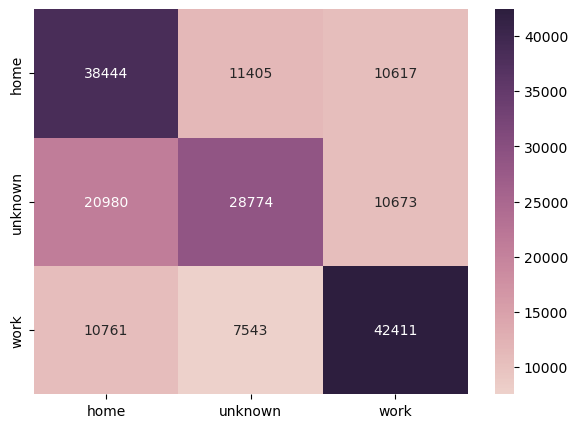

In [58]:



from sklearn.metrics import classification_report, confusion_matrix 

y_pres=dt_final.predict(X_test)
print(dt_final.score(X_test, y_test))
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
df_cm = pd.DataFrame(cm, index=[i for i in ["home", "unknown", "work"]],
                   columns=[i for i in ["home", "unknown", "work"]])
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm,annot=True,fmt='g',cmap=sns.cubehelix_palette(as_cmap=True))

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf_final=RandomForestClassifier()

In [60]:
rf_final.fit(X_train,y_train)

RandomForestClassifier()

In [61]:
print("Best Score:",rf_final.score(X_test,y_test))

Best Score: 0.6396524382185806


In [62]:
print(classification_report(y_test,y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.5478    0.6358    0.5885     60466
           1     0.6030    0.4762    0.5321     60427
           2     0.6658    0.6985    0.6818     60715

    accuracy                         0.6037    181608
   macro avg     0.6055    0.6035    0.6008    181608
weighted avg     0.6056    0.6037    0.6009    181608



0.6396524382185806


<Axes: >

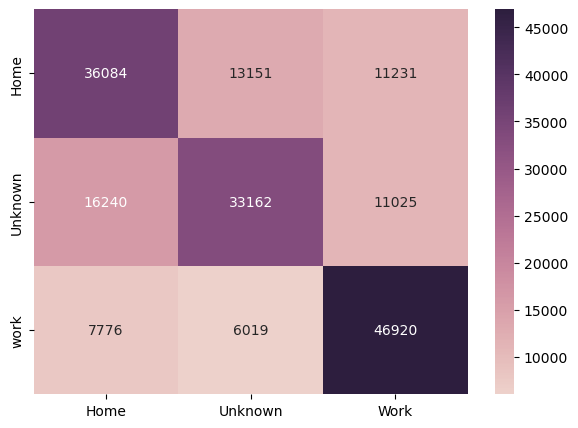

In [63]:
from sklearn.metrics import classification_report, confusion_matrix 

y_pred=rf_final.predict(X_test) 
print(rf_final.score(X_test,y_test))
cm=confusion_matrix(y_test,y_pred, labels=[0,1,2])
df_cm = pd.DataFrame(cm, index = [i for i in ["Home", "Unknown", "work"]],
                     columns = [i for i in ["Home", "Unknown", "Work"]])
plt.figure(figsize = (7,5)) 
sns.heatmap(df_cm, annot=True,fmt='g',cmap=sns.cubehelix_palette(as_cmap=True))


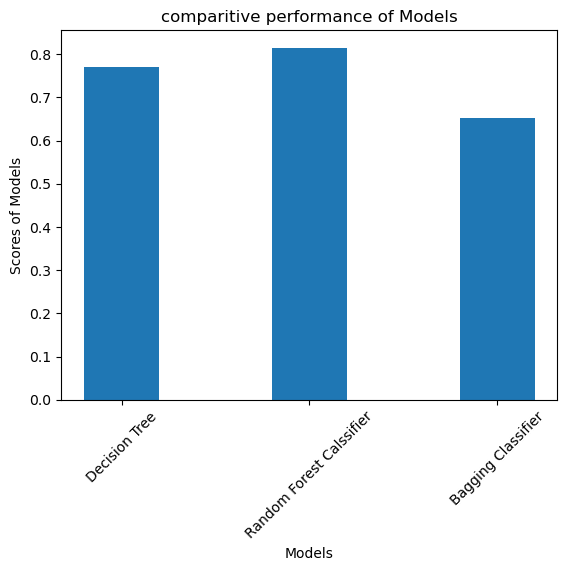

In [64]:

train_score={'Decision Tree':dt_final.score(X_train,y_train),'Random Forest Calssifier':rf_final.score(X_train,y_train),'Bagging Classifier':bc_final.best_score_}
models=list(train_score.keys())
scores=list(train_score.values())
plt.bar(models,scores,width=0.4)
plt.xlabel("Models")
plt.ylabel("Scores of Models")
plt.xticks(rotation=45)
plt.title("comparitive performance of Models")
plt.show()

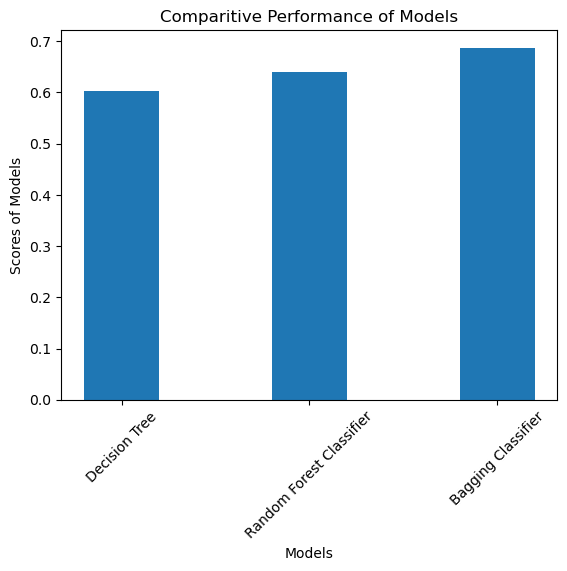

In [65]:

test_score={'Decision Tree':dt_final.score(X_test,y_test),'Random Forest Classifier':rf_final.score(X_test,y_test),'Bagging Classifier':bc_final.score(X_test, y_test)}
models=list(test_score.keys())
scores=list(test_score.values())

plt.bar(models,scores,width=0.4)

plt.xlabel("Models")
plt.ylabel("Scores of Models")
plt.xticks(rotation=45)
plt.title("Comparitive Performance of Models")
plt.show()

In [66]:
print(train_score)
print(test_score)

{'Decision Tree': 0.7697238007136249, 'Random Forest Calssifier': 0.8147438438835294, 'Bagging Classifier': 0.651050614510374}
{'Decision Tree': 0.6036573278710189, 'Random Forest Classifier': 0.6396524382185806, 'Bagging Classifier': 0.6873320558565702}


In [67]:
import pickle

In [68]:
#saving the best model
pickle.dump(bc_final,open("model.pkl","wb"))


In [69]:
pickle.dump(scaler,open("scaler.pkl","wb"))

In [70]:
import joblib

joblib.dump(dt_encoder, "DayTimeEncoder")
joblib.dump(wd_encoder, "WeekdayEncoder")
joblib.dump(wknd_encoder, "wkndEncoder")
joblib.dump(hw_encoder, "HWEncoder")
joblib.dump(w_encoder, "WeatherEncoder")
joblib.dump(c_encoder, "CostEncoder")
joblib.dump(n_encoder, "NameEncoder")

['NameEncoder']